# Count Models: Solutions

In [1]:
suppressPackageStartupMessages(library(tidyverse))

Warning message:
“Installed Rcpp (0.12.12) different from Rcpp used to build dplyr (0.12.11).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”

## Coin toss model

We model Heads as success with value 1 and probability $p$. Conversely, we model Tails as failure with value 0 with probability $1-p$. Suppose we toss 3 coins - these are the possible outcomes:

```
000
001
010
011
100
101
110
111
```

It is easy to see that there are $2^k$ possible outcomes when we toss $k$ coins (or equivlaently toss one coin $k$ times). In statistics, each "toss" is known as a **trial**.

A **random variable** is a function that maps each outcome to a number. For example, the number of successes in 3 trials is a random variable, with the following mapping:

```
000 -> 0
001 -> 1
010 -> 1
011 -> 2
100 -> 1
101 -> 2
110 -> 2
111 -> 3
```

**Count models** are concerned with the behavior of the ranodm variable tht can be interpreted as the number of successes in $k$ trials. In this notebook, we will explore three common count models - the binomial, Poisson and negative binomial distributions.

## Binomial model

Suppose we condcut 10 coin tossing trials. How many times do we see 0, 1, 2 ... successes? Intuitively, this number of successes $k$ can be no smaller than 0 and no larger than 10. Aslo, the number of scucesses will depend on whether the coin is fair or biased. Finally, for a fair coin, $k = 5$ is more likely to occur than $k = 0$ or $k = 10$. Why?

### Fair coin

In [2]:
outcomes <- replicate(100, sum(sample(0:1, 10, replace=TRUE)))

In [3]:
options(repr.plot.width=4, repr.plot.height=3)

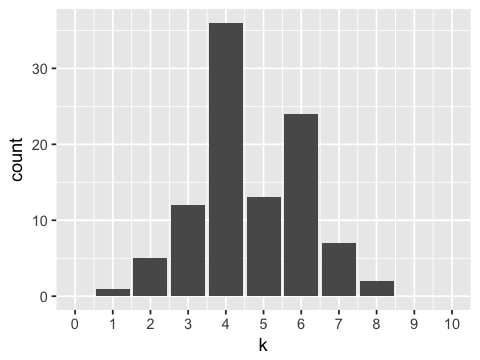

In [4]:
ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

### Biased coin

In [5]:
p <- 0.7
outcomes <- replicate(100, sum(sample(0:1, 10, replace=TRUE, prob = c(1-p, p))))

In [6]:
ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

### The binomial distribution

The two simulations above are examples of draws from the binomial distribtion. Here we repeat the simulaitons using the more compact binomial distribution model.

### Fair coin

In [7]:
outcomes <- rbinom(n=100, size=10, prob=0.5)

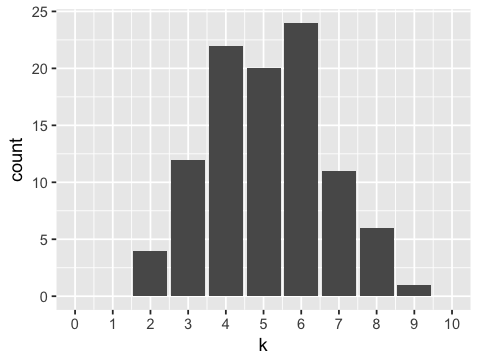

In [8]:
ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

### Biased coin

In [9]:
outcomes <- rbinom(n=100, size=10, prob=0.7)

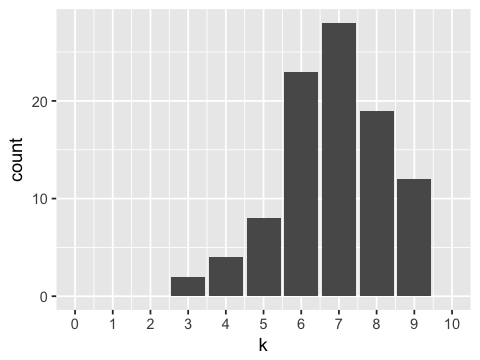

In [10]:
ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

### Exact theoretical distribution

In [11]:
k <- 0:10
n <- dbinom(x = k, size =10, prob = 0.7)

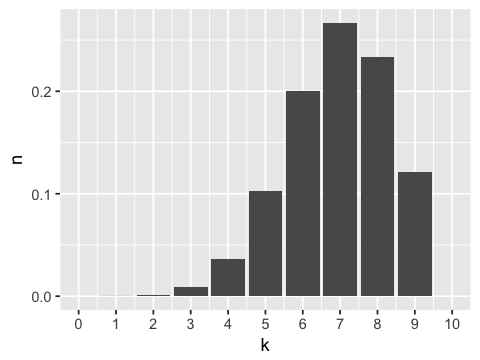

In [12]:
ggplot(data.frame(k=k, n=n), aes(x=k, y=n)) +
geom_bar(stat="identity") +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

**Exercise 1**

Make a horizontal barchart of the number of successes expected from 5 trials when the probability of success in each trial is 0.25.

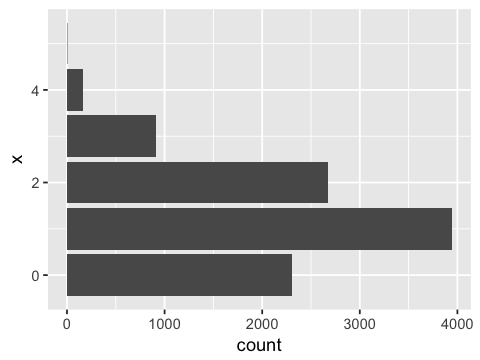

In [13]:
x <- rbinom(10000, 5, 0.25)
ggplot(data.frame(x=x), aes(x=x)) +
geom_bar() + 
coord_flip()

**Exercise 2**

You have a miracle drug that will cure 70% of people infected with HIV. You run many clinical trials with 100 HIV-infected people in each trial using this drug. What fraction of the trials have 80 or more people cured?

- Find the answer using properties of the binomial distribution
- Find the answer using a simulation with 10000 trials

In [14]:
round(100 * (1 - pbinom(79, size=100, prob=0.7)), 2)

[1] 1.65

In [15]:
n <- 10000
x <- rbinom(n, size=100, prob=0.7)
round(100.0 * sum(x > 79)/n, 2)

[1] 1.85

## Mean and variance of the binomial distribution

The mean of the binomial distribuiton is $np$ and the variance is $np(1-p)$. Note that the mean and variance are defined by the same two parameters $n$ and $p$ - once the mean is known, the variance is fixed. Hence it is common for real world data to resemble a binomial distribuiotn except that the variance is larger than expected - this is known as over-dispersion.

In [16]:
n <- 10
p <- 0.7
x <- rbinom(10000, n, p)

In [17]:
mean(x)

[1] 7.0306

In [18]:
round(var(x), 2)

[1] 2.1

In [19]:
n * p * (1-p)

[1] 2.1

## The Poisson distribution

When the number of trials $n$ is very large, and the probability of success $p$ is very small, the binomial distribution can be aproxiated by the simpler Poisson distribution which only has a single parameter $\lambda = np$. 

In [20]:
x <- 0:8
n <- 1000
p <- 0.001
binomial <- dbinom(x, size=n, prob=p)
poisson <-  dpois(x, lambda=n*p)
round(data.frame(x=x, binomial=binomial, poisson=poisson), 4)

x binomial poisson
1 0 0.3677   0.3679 
2 1 0.3681   0.3679 
3 2 0.1840   0.1839 
4 3 0.0613   0.0613 
5 4 0.0153   0.0153 
6 5 0.0030   0.0031 
7 6 0.0005   0.0005 
8 7 0.0001   0.0001 
9 8 0.0000   0.0000

**Exercise 3**

Suppose that RNA-seq results in calling errors (e.g. an A is read as a C) once every 1,000 base pairs, and generated single-end reads of exactly 200 base pairs. What fraction of reads would have more than 2 errors?

In [21]:
p <- 0.001
size <- 200
round((1 - pbinom(2, size, p)), 5)

[1] 0.00113

In [22]:
n <- 1e6
x <- rbinom(n, size, p)
sum(x > 2)/n

[1] 0.001135

## Mean and varinace of the Poisson distribuiotn

The mean of the Poisson distribution is $\lambda$, and its variance is also $\lambda$. Hence, just as for the binomila distribution, it is common to find real-world data that resembles the Posson distribution, except that the variance is larger than expected. This is another example of over-dispersion.

In [23]:
x <- rpois(10000, 3.14)

In [24]:
round(mean(x), 2)

[1] 3.14

In [25]:
round(var(x), 2)

[1] 3.1

## The negative binomial distribution

There are two ways $k$ successes from a series of $n$ Bernoulli trials can arise. In the first way, there were $n$ trials planned, and it just so happened that $k$ of these were successes. This is modeled by the binomial distribution. However, an alternative scenario is that trials are run until exactly $k$ successes are observed. This is modeled by the negative binomial distribution. 

Note that the `nbinom` family of functions in R models the number of **failures** before a target number of successes is reached, and not the number of trials.

In [26]:
binom <- rbinom(n=100, size=10, prob=0.5)
nbinom <- rnbinom(n=100, size=10, prob=0.5)
df <- data.frame(binom=binom, nbinom=nbinom)
df <- df %>% gather(dist, count)

In [27]:
ggplot(df, aes(x=count, color=dist, fill=dist)) + 
facet_wrap(~ dist) +
geom_bar(alpha=0.5) +
guides(color=F, fill=F)

### Utility functions for alternative parameteizations of negative binomial

In [28]:
nb.mean <- function(r, p) {
    r * (1-p)/p
}

nb.var <- function(r, p) {
    r * (1-p)/p^2
}

nb.r <- function(mu, s2) {
    mu^2/(s2 - mu)
}

nb.p <- function(mu, s2) {
    mu/s2
}

nb.disp <- function(mu, s2) {
    (1/mu)*(s2/mu - 1)
}

nb.disp2 <- function(r, p) {
    mu <- nb.mean(r, p)
    s2 <- nb.var(r, p)
    nb.disp(mu, s2)
}

In [29]:
nb.mean(10, 0.5)

[1] 10

In [30]:
nb.var(10, 0.5)

[1] 20

In [31]:
nb.disp2(10, 0.5)

[1] 0.1

In [32]:
x <- rnbinom(n=100000, size=10, prob=0.5)

In [33]:
round(mean(x), 2)

[1] 10.03

In [34]:
round(var(x), 2)

[1] 20.22

**Exercise 4**

Set $\lambda = 1$ for the Poisson distribution, and $\mu = $ for the negative binomial distribution. Compare the two distributions when $\alpha = 0.001$ and $\alpha = 1.0$.

Recall from the lecture that 

$$
\sigma^2 = \mu(1 + \alpha\mu)
$$

In [35]:
compare <- function(n, lambda, mu, alpha) {

    s2 <- mu*(1 + alpha*mu)
    r <- nb.r(mu, s2)
    p <- nb.p(mu, s2)

    x.poisson <- rpois(n, lambda)
    x.nbinom <- rnbinom(n, r, p)
    
    df <- data.frame(poisson=x.poisson, nbinom=x.nbinom)
    df <- df %>% gather(dist, count)
    
    ggplot(df, aes(x=count, fill=dist)) +
    geom_bar(position='dodge')
}

In [36]:
n <- 100000

### When $\alpha$ is small, similar to Poisson

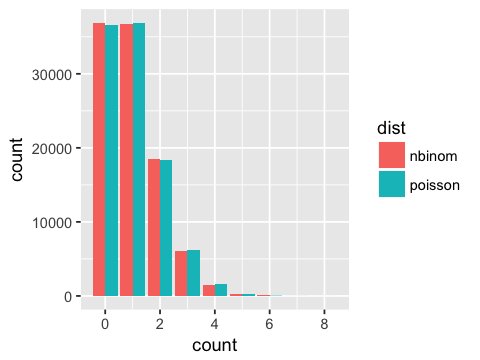

In [37]:
compare(n, 1, 1, 0.001)

### When $\alpha$ is large, variance larger than Poisson

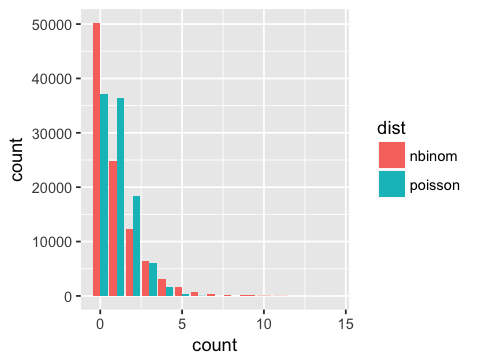

In [38]:
compare(n, 1, 1, 1)

## The multinomial distribution

The binomial distribtion only allows two outcomes traditionally known as success and failure. The multinomial distiribution generalizes the binomial to allow more than two outcomes. 

A common model for the multinomial distribution is that of distributing $n$ balls to $k$ urns.

In [39]:
rmultinom(10, size=10, prob=c(1,2,3,4)/10)

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,] 0    0    0    2    2    0    1    2    0    2    
[2,] 2    2    3    0    2    3    2    1    3    1    
[3,] 3    4    5    2    4    3    1    1    4    2    
[4,] 5    4    2    6    2    4    6    6    3    5

**Exercise 5** 

Suppose the genome has 20,000 genes and we sequence 1 million reads. If each read is equally likely to be mapped to any gene

- What is the average number of reads mapped to each gene?
- What is the standard deviation of the number of reads mapped to each gene?
- what is the 95% confidence interval for this estimate of the mean? You can assume that the means follow a normal distribution.

In [40]:
n.reads <- 1e6
n.genes <- 20000

x <- rmultinom(1, size=n.reads, prob = rep(1, n.genes)/n.genes)

In [41]:
head(x)

[,1]
[1,] 51  
[2,] 49  
[3,] 38  
[4,] 67  
[5,] 37  
[6,] 42

In [42]:
length(x)

[1] 20000

In [43]:
mean(x)

[1] 50

In [44]:
sd(x)

[1] 7.057123

In [45]:
qnorm(0.975)

[1] 1.959964

In [46]:
mu <- mean(x)
me <- sd(x)/sqrt(n.genes)

round(c(mu - qnorm(0.975)*me, mu + qnorm(0.975)*me), 2)

[1] 49.9 50.1